<a href="https://colab.research.google.com/github/JesseHenson/School/blob/main/CSC526_CTA_4_2_henson_jesse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf

import numpy as np

from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# MNIST dataset parameters.

num_classes = 10 # 0 to 9 digits

num_features = 784 # 28*28

# Training parameters.

learning_rate = 0.01

training_steps = 1000

batch_size = 256

display_step = 50


# Convert to float32.

x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Flatten images to 1-D vector of 784 features (28*28).

x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Normalize images value from [0, 255] to [0, 1].

x_train, x_test = x_train / 255., x_test / 255.

# Use tf.data API to shuffle and batch data.

train_data=tf.data.Dataset.from_tensor_slices((x_train,y_train))

train_data=train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

# Weight of shape [784, 10], the 28*28 image features, and a total number of classes.

W = tf.Variable(tf.ones([num_features, num_classes]), name="weight")

# Bias of shape [10], the total number of classes.

b = tf.Variable(tf.zeros([num_classes]), name="bias")

In [4]:
# Logistic regression (Wx + b).

def logistic_regression(x):

    # Apply softmax to normalize the logits to a probability distribution.

    return tf.nn.softmax(tf.matmul(x, W) + b)

# Cross-Entropy loss function.

def cross_entropy(y_pred, y_true):

    # Encode label to a one hot vector.

    y_true = tf.one_hot(y_true, depth=num_classes)

    # Clip prediction values to avoid log(0) error.

    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)

    # Compute cross-entropy.

    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

In [5]:
# Accuracy metric.

def accuracy(y_pred, y_true):

# Predicted class is the index of the highest score in prediction vector (i.e. argmax).

  correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))

  return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Stochastic gradient descent optimizer.

optimizer = tf.optimizers.SGD(learning_rate)

In [6]:
# Optimization process. 

def run_optimization(x, y):

# Wrap computation inside a GradientTape for automatic differentiation.

    with tf.GradientTape() as g:

        pred = logistic_regression(x)

        loss = cross_entropy(pred, y)

    # Compute gradients.

    gradients = g.gradient(loss, [W, b])

  

    # Update W and b following gradients.

    optimizer.apply_gradients(zip(gradients, [W, b]))

In [32]:
loss_trace = []
total_acc = []


# Run training for the given number of steps.

for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):

    # Run the optimization to update W and b values.

    run_optimization(batch_x, batch_y)


    if step % display_step == 0:

        pred = logistic_regression(batch_x)

        loss = cross_entropy(pred, batch_y)

        acc = accuracy(pred, batch_y)

        loss_trace.append(loss)
        total_acc.append(acc)

        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

step: 50, loss: 80.478981, accuracy: 0.902344
step: 100, loss: 101.587982, accuracy: 0.902344
step: 150, loss: 34.819824, accuracy: 0.949219
step: 200, loss: 100.970612, accuracy: 0.917969
step: 250, loss: 111.107628, accuracy: 0.886719
step: 300, loss: 75.068954, accuracy: 0.906250
step: 350, loss: 83.588478, accuracy: 0.945312
step: 400, loss: 101.947556, accuracy: 0.886719
step: 450, loss: 76.838554, accuracy: 0.921875
step: 500, loss: 60.672802, accuracy: 0.921875
step: 550, loss: 81.656158, accuracy: 0.925781
step: 600, loss: 75.742554, accuracy: 0.933594
step: 650, loss: 63.822788, accuracy: 0.937500
step: 700, loss: 27.549782, accuracy: 0.964844
step: 750, loss: 40.585045, accuracy: 0.953125
step: 800, loss: 45.747459, accuracy: 0.957031
step: 850, loss: 55.120087, accuracy: 0.929688
step: 900, loss: 51.524086, accuracy: 0.960938
step: 950, loss: 49.582161, accuracy: 0.933594
step: 1000, loss: 151.867538, accuracy: 0.843750


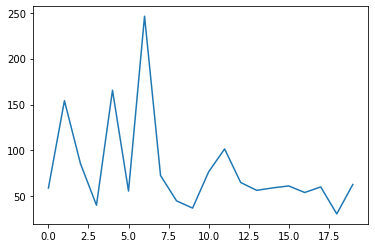

In [11]:
plt.plot(loss_trace)

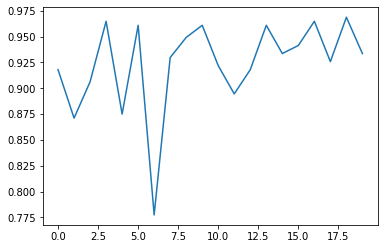

In [12]:
plt.plot(total_acc)